In [6]:
%reload_ext cairo_jupyter

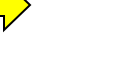

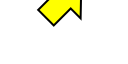

In [24]:
import cairo
import math

from affine import Affine
from collections import namedtuple

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 128, 64)
context = cairo.Context(surface)


def class_repr(self):
    """
    Default class repr that outputs the content of a class.
    """
    members = ', '.join({f'{k}={v}'
                         for k, v in 
                         self.__dict__.items()})
    return f'{self.__class__.__name__}({members})'


class Path:
    def __init__(self):
        self.elements = []
        self.closed = False
        
    def line_to(self, *args):
        assert len(args) == 2
        
        self.elements.append(("line_to", args))
        
    def move_to(self, *args):
        assert len(args) == 2
        
        self.elements.append(("move_to", args))
        
    def close(self):
        self.closed = True
        
    def transform(self, m):
        p = Path()
        for t, pos in self.elements:
            new_pos = m * pos
            if t == "line_to":
                p.line_to(*new_pos)
            elif t == "move_to":
                p.move_to(*new_pos)
            else:
                raise NotImplemented(t)
            if self.closed:
                p.close()
        return p
            
    def draw(self, ctx):
        for t, pos in self.elements:
            if t == "line_to":
                ctx.line_to(*pos)
            elif t == "move_to":
                ctx.move_to(*pos)
            else:
                raise NotImplemented(t)
        if self.closed:
            ctx.close_path()
            
            
    __repr__ = class_repr


def arrow(x, y, width, height, a, b):
    p = Path()
    p.move_to(x, y + b)
    p.line_to(x, y + height - b)
    p.line_to(x + a, y + height - b)
    p.line_to(x + a, y + height)
    p.line_to(x + width, y + height/2)
    p.line_to(x + a, y)
    p.line_to(x + a, y + b)
    p.close()
    return p
 
def draw(path):
    context.set_source_rgb(1, 1, 1)
    #context.scale(10, 10)
    context.paint()
    context.set_source_rgba(1, 1, 0, 1)
    path.draw(context)
    context.fill_preserve()
    context.set_source_rgba(0, 0, 0, 1)
    context.stroke()
    
    display(surface)


path = arrow(100, 10, 50, 50, 24, 14)


path = arrow(-20, -20, 50, 50, 24, 14)
draw(path)

path2 = path.transform(Affine.rotation(-45) * Affine.translation(40, 40))

#print(path2)

draw(path2)

#Matrix2D.Rotate(.1)